Модель прогнозування попиту на майбутні періоди


Джерело даних:  файл monthly-beer-production-in-austr.csv (https://www.kaggle.com/datasets/shenba/time-series-datasets).

Завдання: Розробити модель прогнозування для визначення попиту на майбутні періоди. 
Для описового аналізу вивести споживання за місяцями (1-12), за днями (1-7) та за тижнями (1-52). 
 сезонність та тренд.  
Для прогнозування (діапазон прогнозування - 3 роки) використовувала такі моделі: ARIMA, BATS, TBATS.
  Оцініти ефективність кожної моделі.

Кроки виконання:

Завантажити дані з файлу monthly-beer-production-in-austr.csv.
Вивести описову статистику, включаючи споживання за місяцями, за днями та за тижнями.
Виділіть сезонність та тренд у даному часовому ряді.
Розробити модель ARIMA для прогнозування споживання на майбутні періоди та оцініть її ефективність.
Розробити моделі BATS та TBATS для прогнозування споживання на майбутні періоди та оцініть їх ефективність.
Порівняте результати прогнозування для кожної моделі та обрати найбільш ефективну.


In [1]:
import pandas as pd

beer_df = pd.read_csv('monthly-beer-production-in-austr.csv')
beer_df.head(10)

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
5,1956-06,64.8
6,1956-07,70.1
7,1956-08,77.3
8,1956-09,79.5
9,1956-10,100.6


In [2]:
beer_df.tail()

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [3]:
!pip install sktime
!pip install tbats

   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/28.9 MB 3.6 MB/s eta 0:00:08
   ---------------------------------------- 0.3/28.9 MB 3.8 MB/s eta 0:00:08
    --------------------------------------- 0.6/28.9 MB 4.8 MB/s eta 0:00:06
   - -------------------------------------- 1.0/28.9 MB 6.6 MB/s eta 0:00:05
   - -------------------------------------- 1.2/28.9 MB 5.6 MB/s eta 0:00:05
   - -------------------------------------- 1.3/28.9 MB 6.0 MB/s eta 0:00:05
   --- ------------------------------------ 2.4/28.9 MB 8.5 MB/s eta 0:00:04
   --- ------------------------------------ 2.4/28.9 MB 7.4 MB/s eta 0:00:04
   ----- ---------------------------------- 3.9/28.9 MB 9.5 MB/s eta 0:00:03
   ------ --------------------------------- 4.4/28.9 MB 9.6 MB/s eta 0:00:03
   ------ --------------------------------- 4.8/28.9 MB 9.9 MB/s eta 0:00:03
   ------- -------------------------------- 5.2/28.9 MB 9.8 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/44.0 kB ? eta -:--:--
   ---------------------------------------- 44.0/44.0 kB 718.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------- ------------------------------ 143.4/625.1 kB 2.8 MB/s eta 0:00:01
   -------------------- ------------------- 317.4/625.1 kB 3.3 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/625.1 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.8 MB ? eta -:--:--
   -------------- ------------------------- 1.0/2.8 MB 10.9 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 11.3 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.8 MB 11.3 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 12.1 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
beer_df.info

<bound method DataFrame.info of        Month  Monthly beer production
0    1956-01                     93.2
1    1956-02                     96.0
2    1956-03                     95.2
3    1956-04                     77.1
4    1956-05                     70.9
..       ...                      ...
471  1995-04                    127.0
472  1995-05                    151.0
473  1995-06                    130.0
474  1995-07                    119.0
475  1995-08                    153.0

[476 rows x 2 columns]>

In [5]:
beer_df['Month'] = pd.to_datetime(beer_df['Month'])
#beer_df["Day"]=beer_df.Month.dt.day
beer_df["Year"]=beer_df.Month.dt.year
beer_df["months"]=beer_df.Month.dt.month
beer_df["Day of week"]=beer_df.Month.dt.dayofweek
beer_df["Week"]=beer_df.Month.dt.isocalendar().week
beer_df.head()

,Month,Monthly beer production,Year,months,Day of week,Week
0,1956-01-01,93.2,1956,1,6,52
1,1956-02-01,96.0,1956,2,2,5
2,1956-03-01,95.2,1956,3,3,9
3,1956-04-01,77.1,1956,4,6,13
4,1956-05-01,70.9,1956,5,1,18


In [6]:
beer_df = beer_df.set_index(['Month'])

In [7]:
beer_df.tail()

,Monthly beer production,Year,months,Day of week,Week
Month,,,,,
1995-04-01,127.0,1995,4,5,13
1995-05-01,151.0,1995,5,0,18
1995-06-01,130.0,1995,6,3,22
1995-07-01,119.0,1995,7,5,26
1995-08-01,153.0,1995,8,1,31


<function matplotlib.pyplot.show(close=None, block=None)>

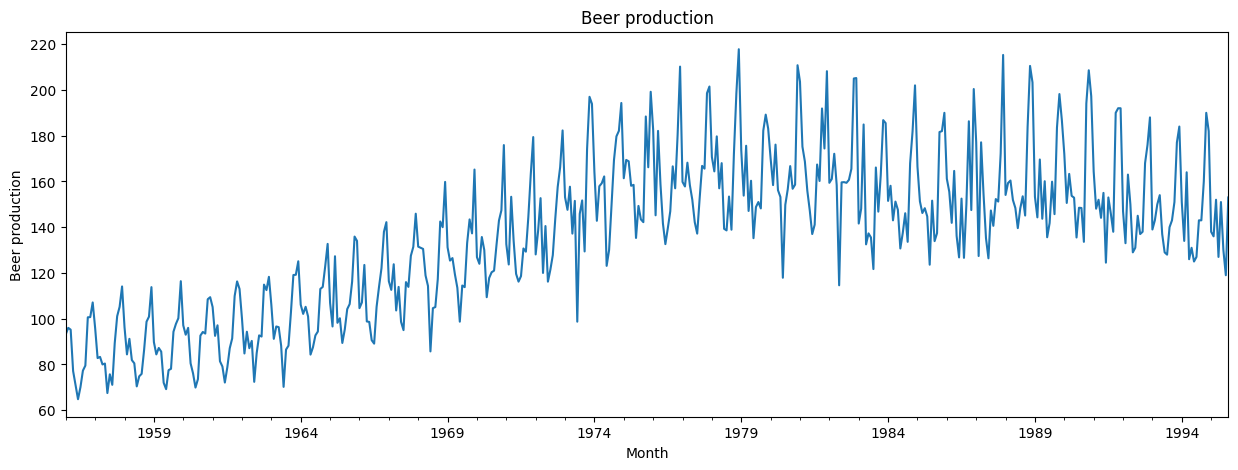

In [8]:
import matplotlib.pyplot as plt

beer_df["Monthly beer production"].plot(figsize=(15,5))
plt.xlabel("Month")
plt.ylabel("Beer production")
plt.title("Beer production")
plt.show

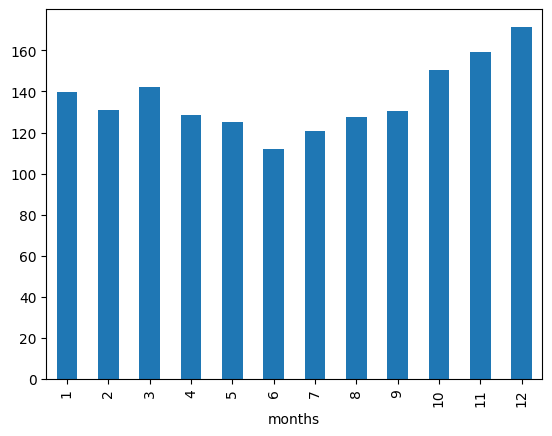

In [9]:
#months vs beer production
beer_df.groupby("months")["Monthly beer production"].mean().plot.bar()
plt.show()

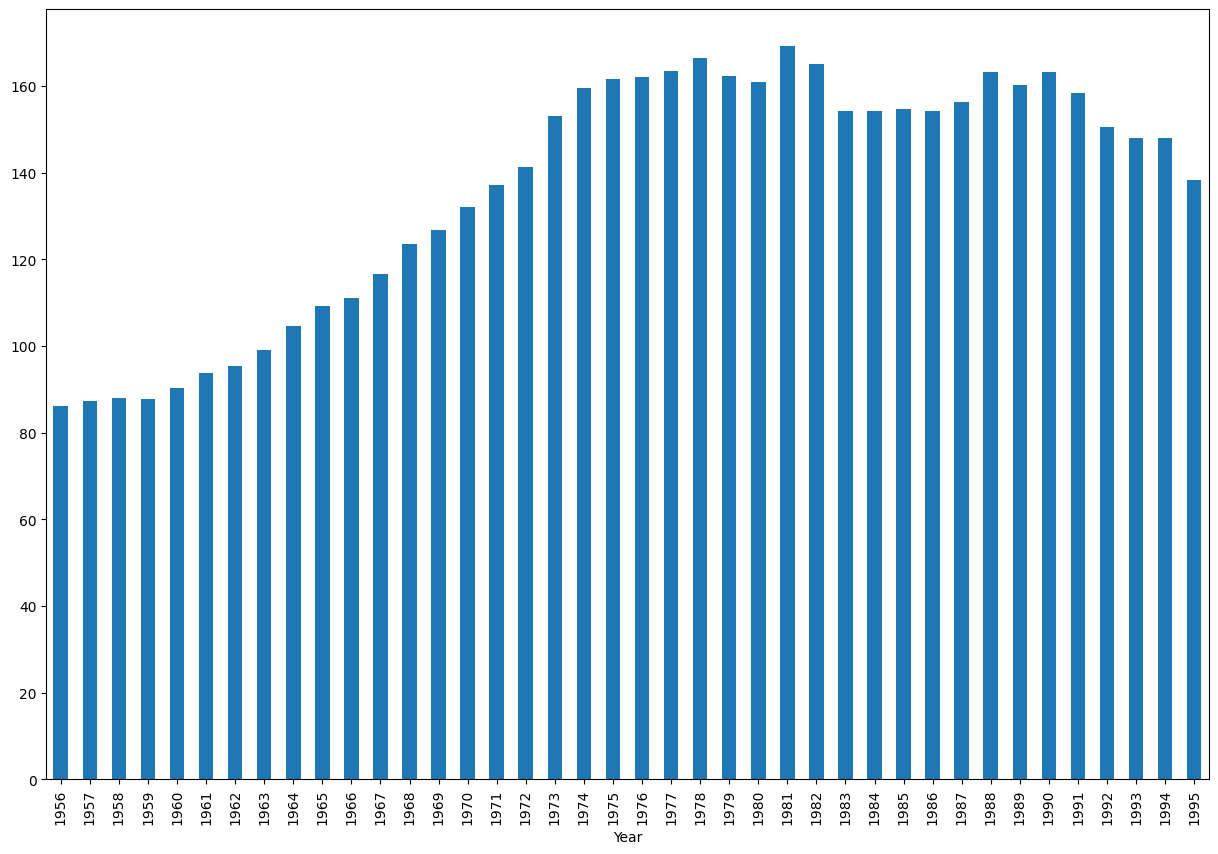

In [10]:
#Years vs beer production
beer_df.groupby("Year")["Monthly beer production"].mean().plot.bar(figsize=(15,10))
plt.show()

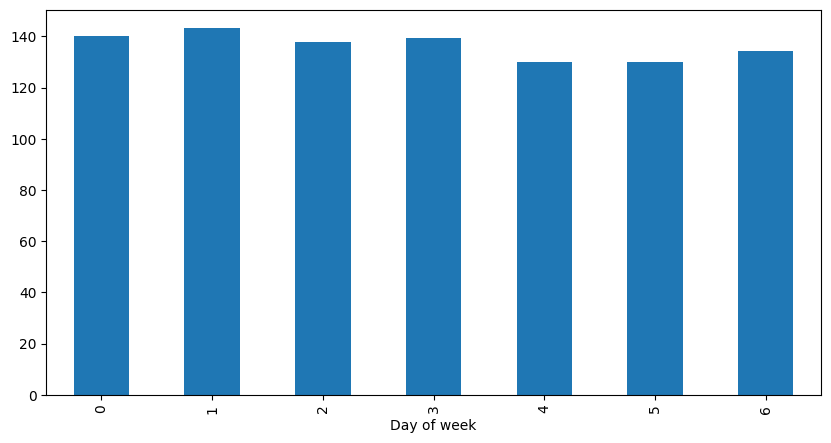

In [11]:
#Day of week vs beer production
beer_df.groupby("Day of week")["Monthly beer production"].mean().plot.bar(figsize=(10, 5))
plt.show()

<Figure size 1500x800 with 0 Axes>

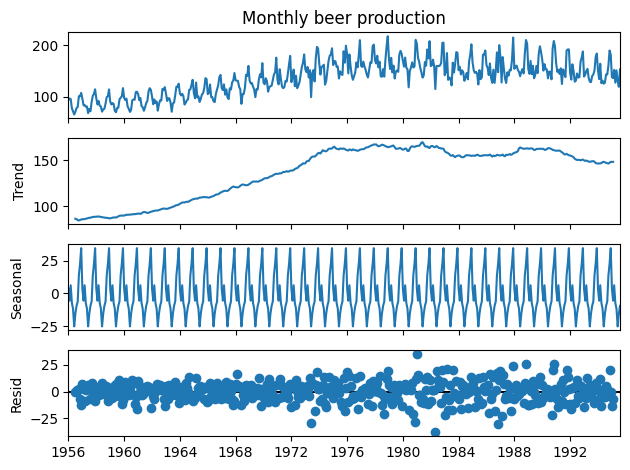

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose 

# Побудова адитивної моделі
model_additive = seasonal_decompose(beer_df['Monthly beer production'], model='additive')
plt.figure(figsize=(15,8))
model_additive.plot()

plt.show()

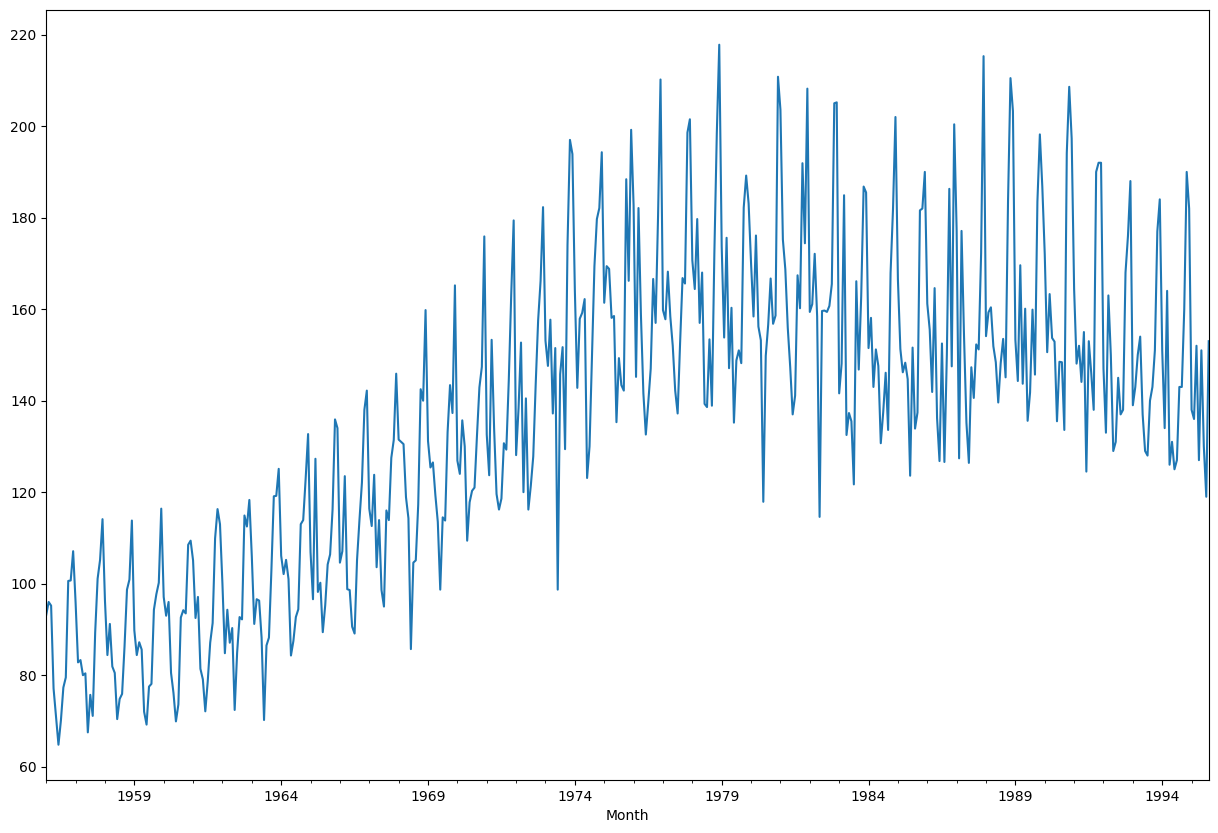

In [13]:
level = model_additive.observed
level.plot(figsize = (15, 10))
plt.show()

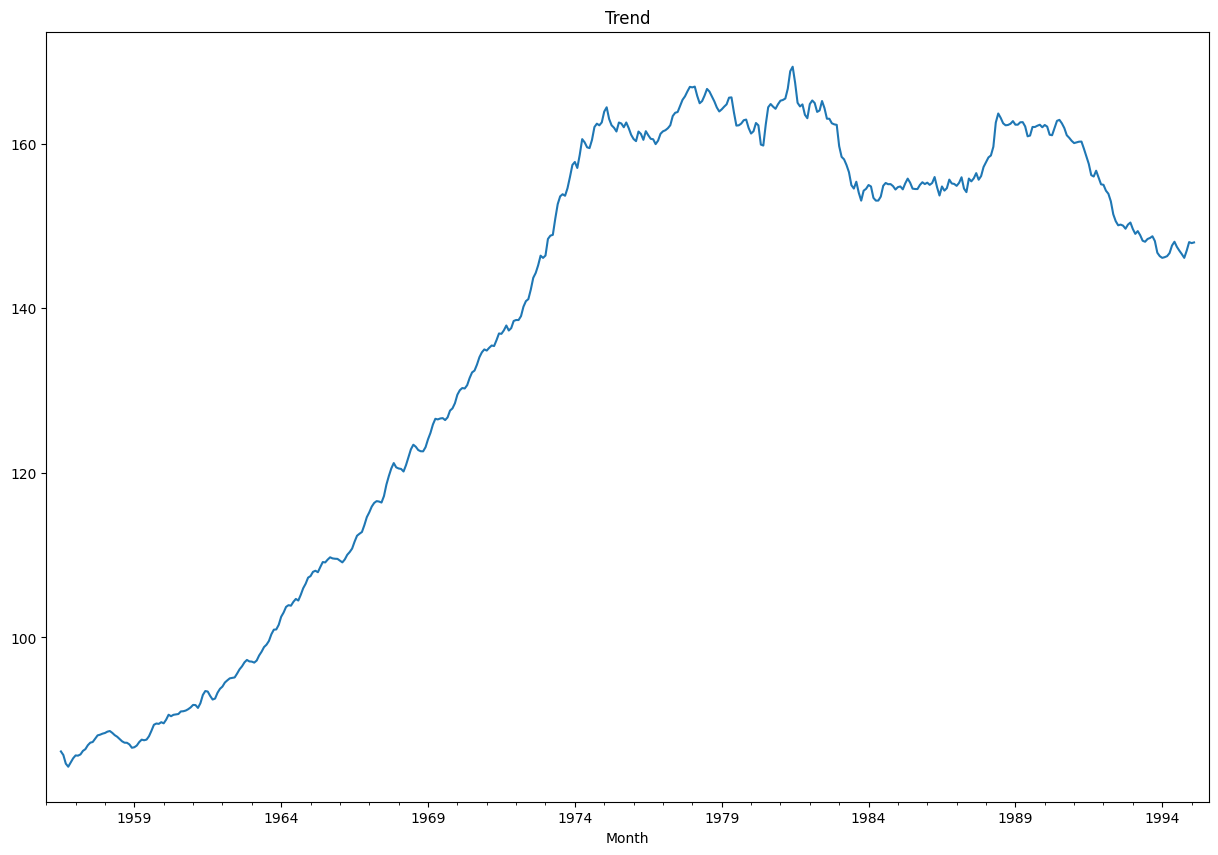

In [14]:
trend=model_additive.trend
trend.plot(figsize = (15, 10))
plt.title("Trend")
plt.show()

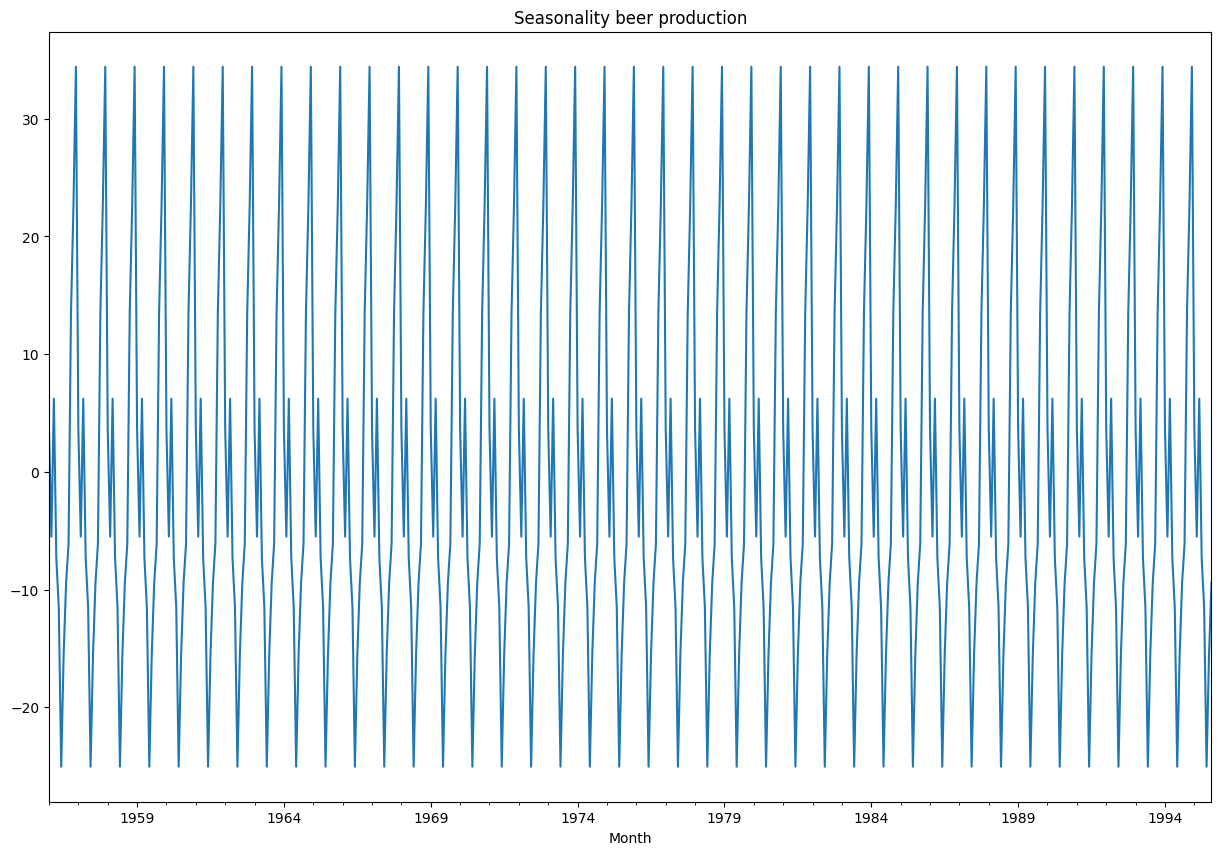

In [15]:
seasonality = model_additive.seasonal
seasonality.plot(figsize = (15, 10))
plt.title('Seasonality beer production')
plt.show()

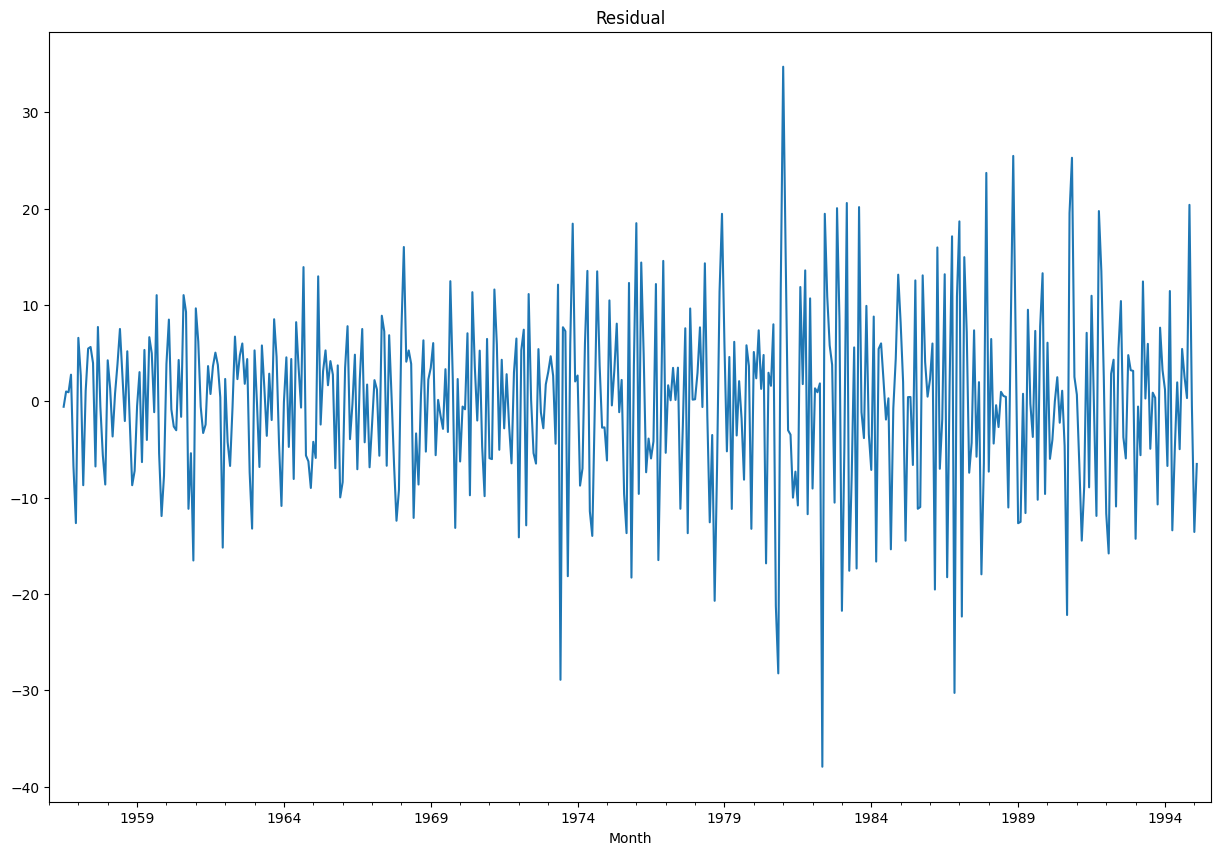

In [16]:
residual = model_additive.resid
residual.plot(figsize = (15, 10))
plt.title("Residual")
plt.show()

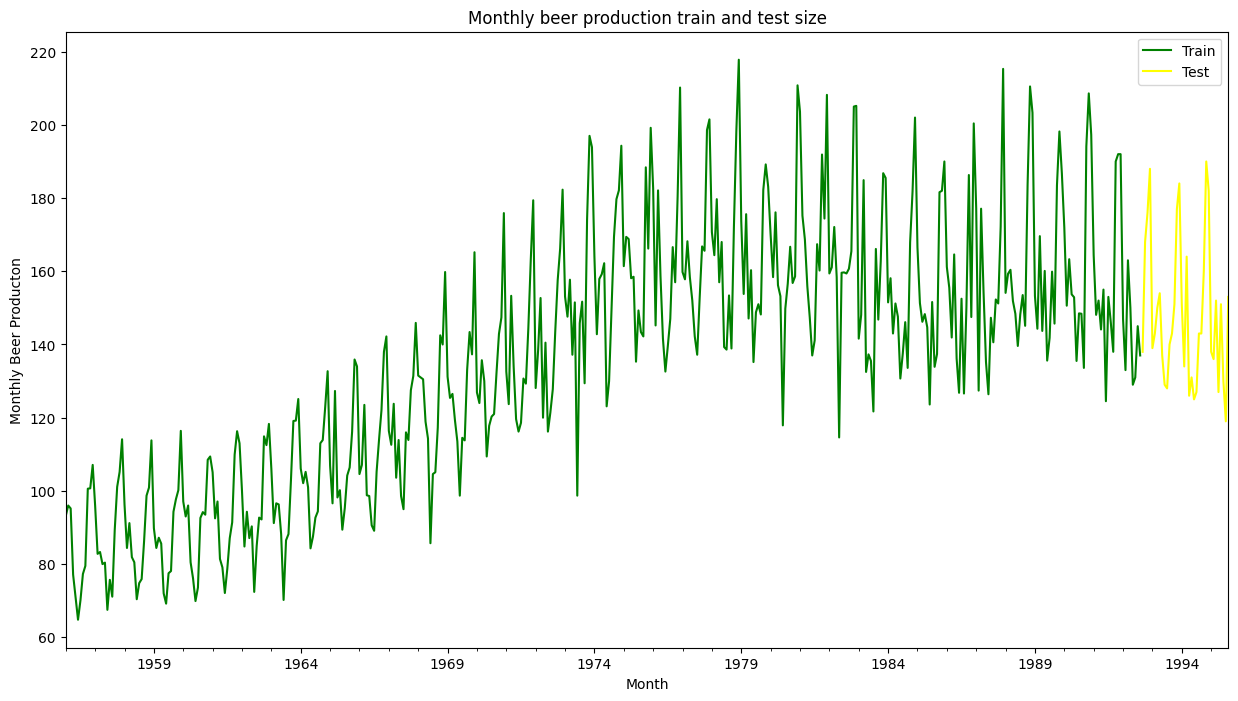

In [17]:
train = beer_df[:-36] 
test = beer_df[-36:] 
plt.figure(figsize=(15,8))
train["Monthly beer production"].plot(label="Train", color='green')
test["Monthly beer production"].plot(label="Test", color='yellow')

plt.legend(loc='best')
plt.xlabel("Month")
plt.ylabel("Monthly Beer Producton")

plt.title("Monthly beer production train and test size")
plt.show()

In [18]:
from sktime.forecasting.base import ForecastingHorizon

train.index = train.index.to_period('M').to_timestamp('M')
test.index = test.index.to_period('M').to_timestamp('M')

fh_36m = ForecastingHorizon(pd.date_range("1992-09", periods=36, freq="M"), is_relative=False
)

cutoff = pd.PeriodIndex(["1992-09"], freq="M")[0]

fh_36m.to_absolute(cutoff)
fh_36m



C:\Users\Natalia\AppData\Local\Temp\ipykernel_3428\1028061638.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fh_36m = ForecastingHorizon(pd.date_range("1992-09", periods=36, freq="M"), is_relative=False


ForecastingHorizon(['1992-09-30', '1992-10-31', '1992-11-30', '1992-12-31',
               '1993-01-31', '1993-02-28', '1993-03-31', '1993-04-30',
               '1993-05-31', '1993-06-30', '1993-07-31', '1993-08-31',
               '1993-09-30', '1993-10-31', '1993-11-30', '1993-12-31',
               '1994-01-31', '1994-02-28', '1994-03-31', '1994-04-30',
               '1994-05-31', '1994-06-30', '1994-07-31', '1994-08-31',
               '1994-09-30', '1994-10-31', '1994-11-30', '1994-12-31',
               '1995-01-31', '1995-02-28', '1995-03-31', '1995-04-30',
               '1995-05-31', '1995-06-30', '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', freq='ME', is_relative=False)

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sktime.forecasting.bats import BATS 
from sktime.forecasting.tbats import TBATS
from sklearn.metrics import mean_squared_error

# ARIMA model
model = ARIMA(train['Monthly beer production'], order=[5, 1, 0], seasonal_order= (0, 1, 2, 12))
model_arima = model.fit()
arima_forecast = model_arima.forecast(steps=36)
arima_rmse = mean_squared_error(test['Monthly beer production'], arima_forecast, squared=False)

# BATS model
bats_model = BATS(sp=[12], use_trend=True, use_box_cox=False)
bats_model.fit(train['Monthly beer production'])
bats_forecast = bats_model.predict(fh_36m)
bats_rmse = mean_squared_error(test['Monthly beer production'], bats_forecast, squared=False)

# TBATS model
tbats_model = TBATS(sp=[12]).fit(train['Monthly beer production'])
tbats_forecast = tbats_model.predict(fh_36m)
tbats_rmse = mean_squared_error(test['Monthly beer production'], tbats_forecast, squared=False)

print(f'ARIMA RMSE: {arima_rmse}')
print(f'BATS RMSE: {bats_rmse}')
print(f'TBATS RMSE: {tbats_rmse}')

c:\Users\Natalia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Natalia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA RMSE: 9.759397189449349
BATS RMSE: 8.768569765262244
TBATS RMSE: 8.93353049262289


c:\Users\Natalia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


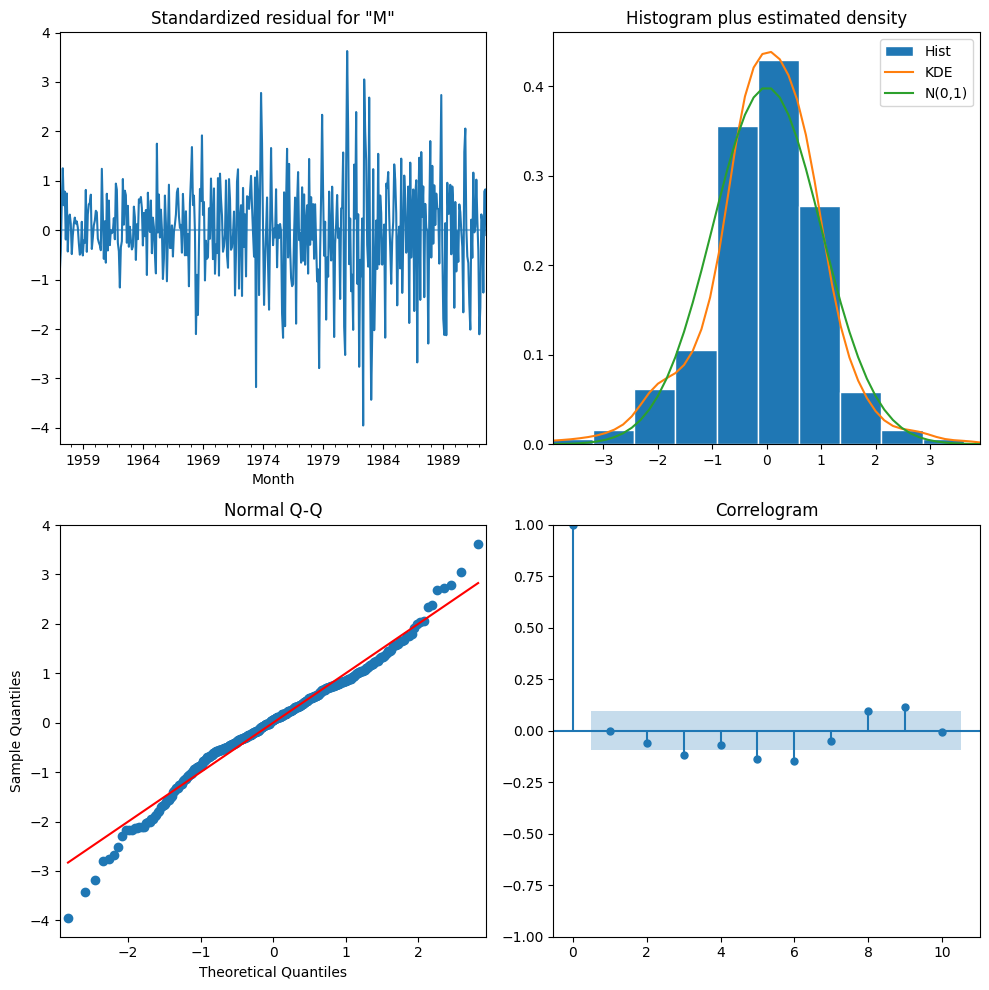

In [20]:
model_arima.plot_diagnostics(figsize=(10,10))
plt.tight_layout();

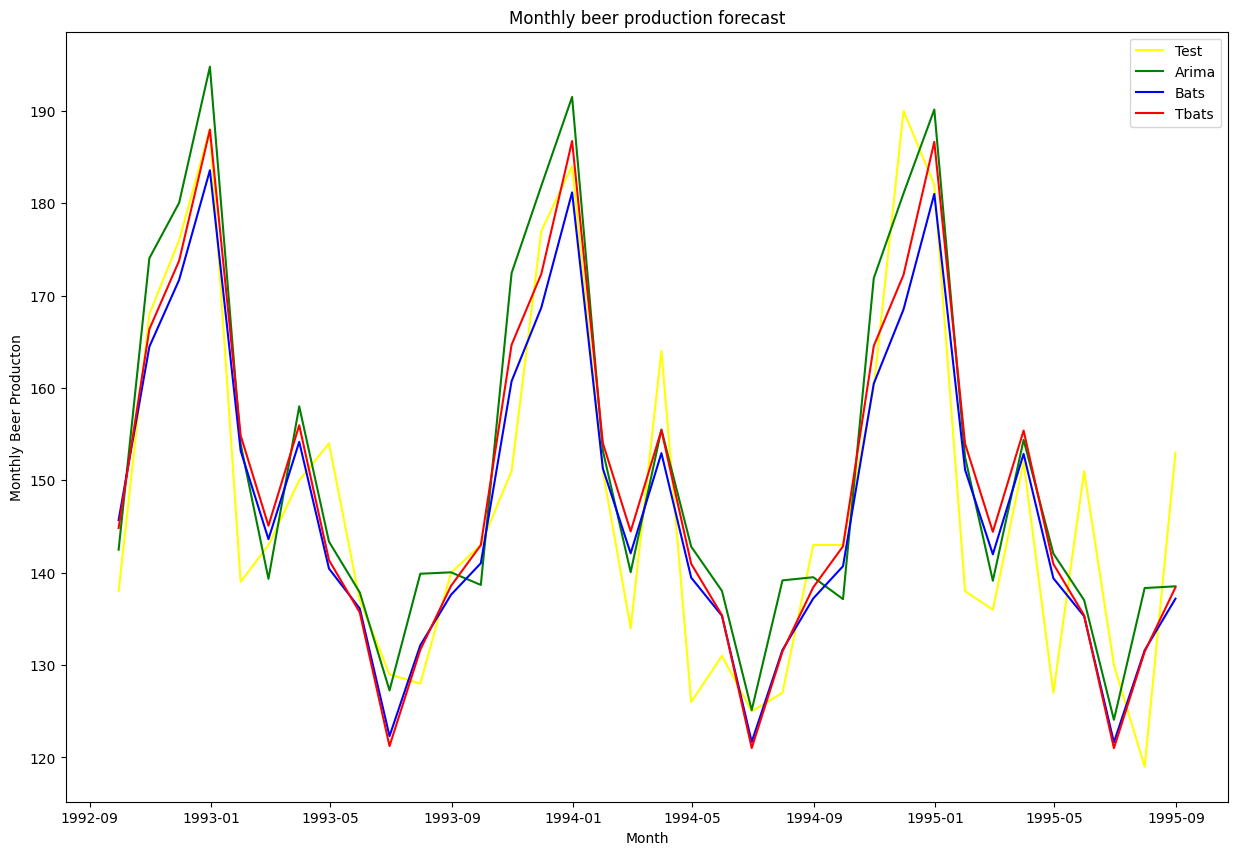

In [21]:

#A Simple comparision between predicted models vs actua
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(test["Monthly beer production"], label="Test", color='yellow')

plt.plot(arima_forecast, label="Arima", color='green')
plt.plot(bats_forecast, label="Bats", color='blue')
plt.plot(tbats_forecast, label="Tbats", color='red')

plt.legend(loc='best')
plt.xlabel("Month")
plt.ylabel("Monthly Beer Producton")
plt.title("Monthly beer production forecast")
plt.show()

ми бачимо, що по rmse bats найменьша, дорівнює 8,36. тобто модель Bats краща модель для нашого набору даних по виробництву пива. Навіть по графіку ми бачимор, що червона лінія приближена до жовтої - тестового набору даних.